In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the uploaded dataset
data_path = '../sum_data-0.csv'
data = pd.read_csv(data_path)

data.head()

,data,label
0,job posting - apple-iss research center conten...,0.0
1,"lang classification grimes , joseph e . and b...",0.0
2,query : letter frequencies for text identifica...,0.0
3,risk a colleague and i are researching the dif...,0.0
4,request book information earlier this morning ...,0.0


In [4]:
# Clean the data
data_clean = data.dropna(subset=['data'])

In [6]:
# Extract the texts and labels
texts = data_clean['data']
labels = data_clean['label']

In [7]:
# Extract data to vectors TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts)

In [8]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

In [9]:
# Data is a dense matrix.
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

In [10]:
# Create a Label Propagation model
model = LabelPropagation()

In [11]:
# Train the model
model.fit(X_train_dense, y_train)

LabelPropagation()

In [13]:
# Predict the labels
y_pred = model.predict(X_test_dense)

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.6335227272727273
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.48      0.65       495
         1.0       0.45      1.00      0.62       209

    accuracy                           0.63       704
   macro avg       0.72      0.74      0.63       704
weighted avg       0.83      0.63      0.64       704



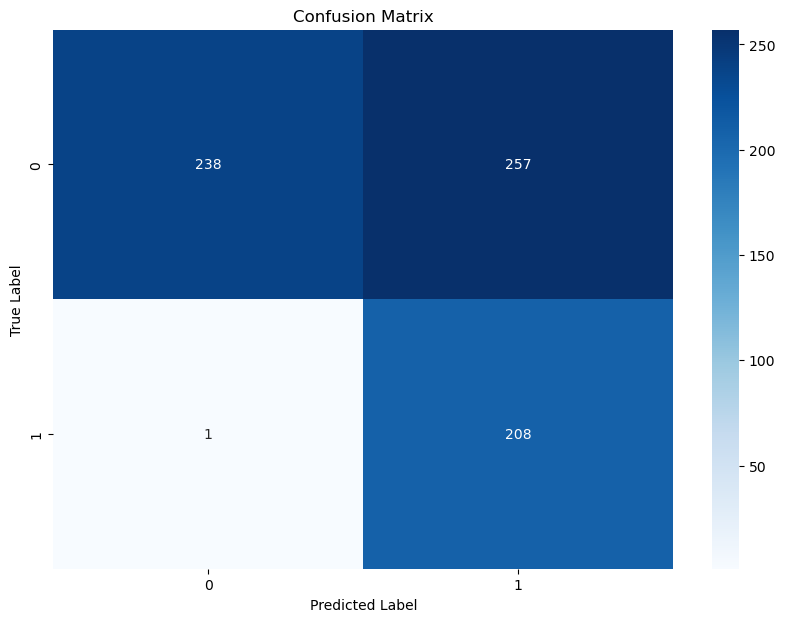

In [15]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

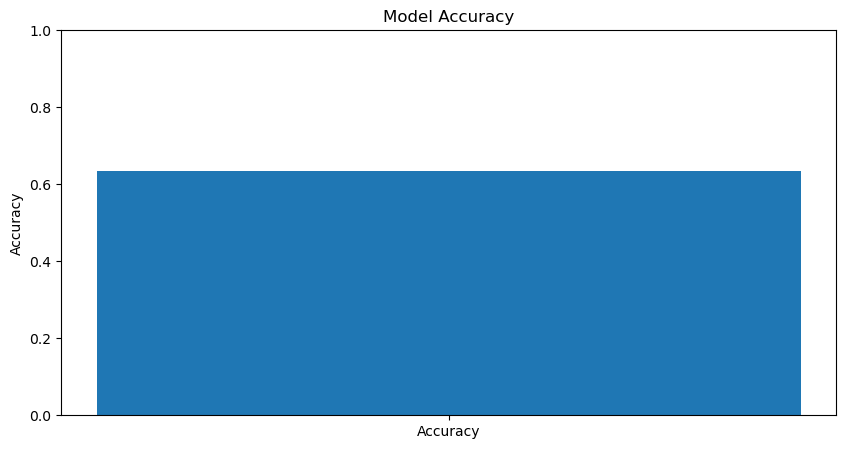

In [16]:
# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(['Accuracy'], [accuracy])
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.ylim(0, 1)
plt.show()

In [18]:
from joblib import load
import joblib

In [20]:
# Save the model
model_path = './model_lpn.joblib'
joblib.dump(model, model_path)

# Save the vectorizer
vectorizer_path = './vectorizer_lpn.joblib'
joblib.dump(vectorizer, vectorizer_path)



['./vectorizer.joblib']

In [21]:
# Load the model
loaded_model = load(model_path)

# Load the vectorizer
loaded_vectorizer = load(vectorizer_path)

In [25]:
text_not_spam = "Hey! How are you doing. Let's catch up soon!"
text_spam = "Congratulations! You've been selected as a winner. Text WON to 44255 to claim your prize."

# Predict the label of the text
text = [text_not_spam, text_spam]

# Transform the text to vectors
test_vectors = loaded_vectorizer.transform(text)

text_predictions = loaded_model.predict(test_vectors.toarray())

In [26]:
for txt, label in zip(text, text_predictions):
    print(f'Text: {txt} is ' + ('spam' if label == 1 else 'not spam'))
    print(f'Label: {label} is ' + ('spam' if label == 1 else 'not spam'))
    print('---')

Text: Hey! How are you doing. Let's catch up soon! is spam
Label: 1.0 is spam
---
Text: Congratulations! You've been selected as a winner. Text WON to 44255 to claim your prize. is spam
Label: 1.0 is spam
---
